# LIBRARY

In [108]:
import pandas as pd
import datetime as dt
import os
from matplotlib import pyplot as plt
from itertools import combinations
from collections import Counter

In [109]:
files = [file for file in os.listdir("Sales_Data")]
files.remove(".ipynb_checkpoints")
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [110]:
df = pd.DataFrame()
for file in files:
    dfn = pd.read_csv("Sales_Data/"+file)
    df = pd.concat([df,dfn])

df.to_csv("Sales_Data/Merged.csv", index=False)

In [111]:
df1 = pd.read_csv("Sales_Data/Merged.csv")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning The Data

## Removing NA Rows

In [112]:
df1[df1.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df1 = df1.dropna(how="any").reset_index(drop=True)

In [114]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Removing Invalid Data

In [115]:
df1['Order Date'].str.contains(pat="[a-zA-Z]", na=False, regex=True).sum()

355

In [116]:
df1[df1['Order Date'].str.contains(pat="[a-zA-Z]", na=False, regex=True) == True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [117]:
new_df = df1.drop(df1[df1['Order Date'].str.contains(pat="[a-zA-Z]", na=False, regex=True) == True].index)

In [118]:
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Dropping Duplicates

In [119]:
new_df.drop_duplicates(inplace = True)

In [120]:
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [121]:
new_df.reset_index(drop = True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Creating Required Fields

In [122]:
new_df["Date"] = pd.to_datetime(new_df["Order Date"], format="%m/%d/%y %H:%M")
new_df = new_df.drop('Order Date', 1)

C:\Users\Hp\AppData\Local\Temp/ipykernel_12340/1752732207.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = new_df.drop('Order Date', 1)


In [123]:
new_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00
2,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00
186301,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00
186302,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00
186303,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00


In [124]:
type(new_df['Price Each'][0])

str

In [125]:
new_df['Price Each'] = new_df['Price Each'].astype('float')

In [126]:
type(new_df['Price Each'][0])

numpy.float64

In [127]:
type(new_df['Quantity Ordered'][0])

str

In [128]:
new_df['Quantity Ordered'] = new_df['Quantity Ordered'].astype('int')

In [129]:
type(new_df['Quantity Ordered'][0])

numpy.int32

In [132]:
new_df['Total Sales'] = new_df['Price Each'] * new_df['Quantity Ordered']
new_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Total Sales
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.90
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.00
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00,8.97
186301,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00,700.00
186302,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00,700.00
186303,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00,379.99


In [133]:
temp1 = []
temp2 = []
temp3 = []
for i in new_df['Purchase Address']:
    temp1.append(i.split(',')[1].strip())
    temp2.append(i.split(',')[2].strip()[0:2])
    temp3.append(i.split(',')[2].strip()[-5:])

In [134]:
print(temp1[0:10])

['Dallas', 'Boston', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'San Francisco', 'Seattle', 'Atlanta', 'San Francisco', 'Boston']


In [135]:
print(temp2[0:10])

['TX', 'MA', 'CA', 'CA', 'CA', 'CA', 'WA', 'GA', 'CA', 'MA']


In [136]:
print(temp3[0:10])

['75001', '02215', '90001', '90001', '90001', '94016', '98101', '30301', '94016', '02215']


In [137]:
new_df['City'] = temp1

In [138]:
new_df['State'] = temp2

In [139]:
new_df['Zip Code'] = temp3

In [141]:
new_df.reset_index(drop=True)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Total Sales,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.90,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99,Boston,MA,02215
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.00,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00,8.97,Los Angeles,CA,90001
185682,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00,700.00,San Francisco,CA,94016
185683,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00,700.00,San Francisco,CA,94016
185684,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00,379.99,San Francisco,CA,94016


# Questions

## Sales Per Month

In [142]:
SalesMonth_DF = new_df.groupby(
    [pd.DatetimeIndex(new_df["Date"]).month]
)["Total Sales"].sum()

In [143]:
month = list(SalesMonth_DF.keys())
sales_month = list(SalesMonth_DF)

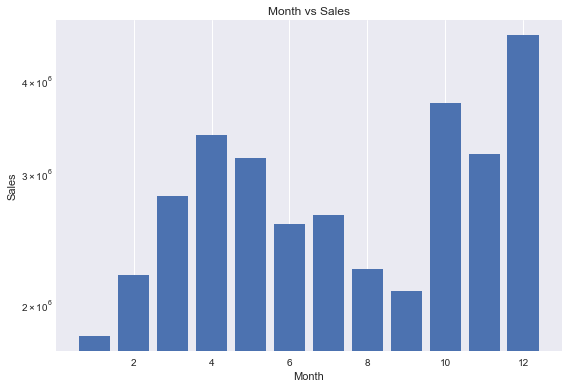

In [144]:
plt.style.use('seaborn')
plt.bar(month,sales_month, log=True)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Month vs Sales")
plt.tight_layout()
plt.show()

## Sales Per City

In [145]:
SalesCity_DF = new_df.groupby(
    ["City"]
)["Total Sales"].sum()

In [146]:
SalesCity_DF

City
Atlanta          2794199.07
Austin           1818044.33
Boston           3658627.65
Dallas           2765373.96
Los Angeles      5448304.28
New York City    4661867.14
Portland         2319331.94
San Francisco    8254743.55
Seattle          2745046.02
Name: Total Sales, dtype: float64

In [147]:
city = list(SalesCity_DF.keys())
sales_city = list(SalesCity_DF)

In [148]:
print(city)
print(sales_city)

['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']
[2794199.07, 1818044.33, 3658627.65, 2765373.96, 5448304.28, 4661867.14, 2319331.94, 8254743.55, 2745046.02]


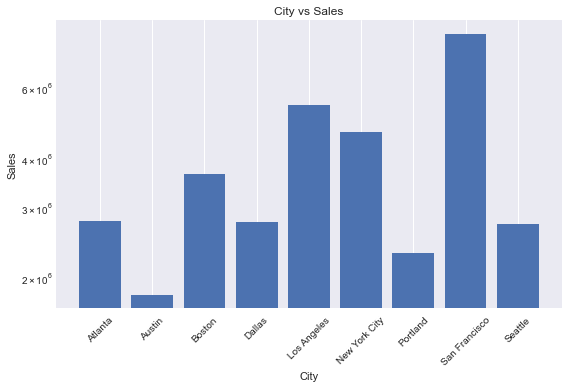

In [149]:
plt.style.use('seaborn')
plt.bar(city,sales_city, log=True)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City vs Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [150]:
new_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Total Sales,City,State,Zip Code
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.90,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99,Boston,MA,02215
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.00,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00,8.97,Los Angeles,CA,90001
186301,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00,700.00,San Francisco,CA,94016
186302,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00,700.00,San Francisco,CA,94016
186303,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00,379.99,San Francisco,CA,94016


In [151]:
new_df.to_csv("Sales_Data/Merged.csv", index=False)

## Average Sales Per Hour

In [152]:
sales_by_hour = list(new_df.groupby([new_df['Date'].dt.hour])['Total Sales'].mean())
hours = list(new_df.groupby([new_df['Date'].map(lambda x : (x.hour))])['Total Sales'].mean().keys())

In [153]:
sales_by_hour = [round(num) for num in sales_by_hour]
print(sales_by_hour)

[183, 196, 189, 176, 191, 175, 181, 186, 191, 188, 178, 185, 184, 178, 190, 191, 184, 195, 181, 187, 187, 187, 182, 188]


In [154]:
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


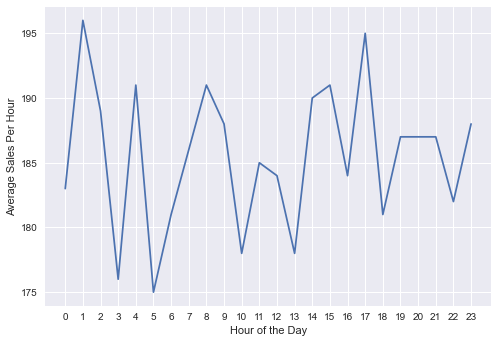

In [155]:
plt.plot(hours,sales_by_hour)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Sales Per Hour")
plt.xticks(hours)
plt.grid(True)
plt.show()

## Most Popular Products Bought Together

In [156]:
temp_df = new_df

In [157]:
temp_df['Grouped'] = temp_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [158]:
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Total Sales,City,State,Zip Code,Grouped
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,23.90,Dallas,TX,75001,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,99.99,Boston,MA,02215,Bose SoundSport Headphones
2,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,600.00,Los Angeles,CA,90001,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,11.99,Los Angeles,CA,90001,"Google Phone,Wired Headphones"
4,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,11.99,Los Angeles,CA,90001,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00,8.97,Los Angeles,CA,90001,AAA Batteries (4-pack)
186301,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00,700.00,San Francisco,CA,94016,iPhone
186302,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00,700.00,San Francisco,CA,94016,iPhone
186303,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00,379.99,San Francisco,CA,94016,34in Ultrawide Monitor


In [159]:
temp_df = temp_df[['Order ID', 'Grouped']].drop_duplicates()

In [160]:
temp_df.reset_index(drop=True)

,Order ID,Grouped
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
3,176561,Wired Headphones
4,176562,USB-C Charging Cable
...,...,...
178432,259353,AAA Batteries (4-pack)
178433,259354,iPhone
178434,259355,iPhone
178435,259356,34in Ultrawide Monitor


In [161]:
count = Counter()

for row in temp_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

# Can Replace 2 to 3 in combinations() function to get combinations of 3 items
    
for key,value in count.most_common(10):
    print(f'{key} ---> {value}')

('iPhone', 'Lightning Charging Cable') ---> 1002
('Google Phone', 'USB-C Charging Cable') ---> 985
('iPhone', 'Wired Headphones') ---> 447
('Google Phone', 'Wired Headphones') ---> 413
('Vareebadd Phone', 'USB-C Charging Cable') ---> 361
('iPhone', 'Apple Airpods Headphones') ---> 360
('Google Phone', 'Bose SoundSport Headphones') ---> 220
('USB-C Charging Cable', 'Wired Headphones') ---> 159
('Vareebadd Phone', 'Wired Headphones') ---> 143
('Lightning Charging Cable', 'Wired Headphones') ---> 92


In [162]:
product = list(new_df.groupby(['Product'])['Total Sales'].count().keys())
count = list(new_df.groupby(['Product'])['Total Sales'].count())
price = list(new_df.groupby(['Product'])['Price Each'].mean())

## Sales Vs Price Graph

C:\Users\Hp\AppData\Local\Temp/ipykernel_12340/4044598187.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation=90)


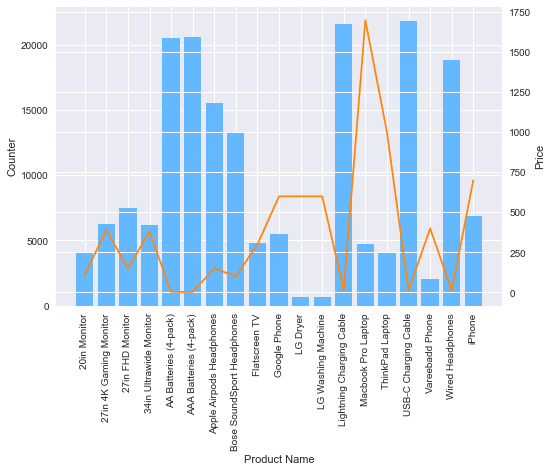

In [163]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,count,label="Count of Product",color="#63b8ff")
ax2.plot(product,price,label="Price of Product",color="#FF850D")
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Counter")
ax2.set_ylabel("Price")
ax1.set_xticklabels(product,rotation=90)
plt.show()